In [ ]:
! pip install transformers
! pip install datasets

     |████████████████████████████████| 4.0 MB 8.0 MB/s 
     |████████████████████████████████| 77 kB 3.4 MB/s 
     |████████████████████████████████| 596 kB 46.2 MB/s 
     |████████████████████████████████| 6.6 MB 32.4 MB/s 
     |████████████████████████████████| 895 kB 33.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 325 kB 5.4 MB/s 
     |████████████████████████████████| 212 kB 44.9 MB/s 
     |████████████████████████████████| 136 kB 45.7 MB/s 
     |████████████████████████████████| 1.1 MB 47.4 MB/s 
     |████████████████████████████████| 127 kB 36.3 MB/s 
     |████████████████████████████████| 94 kB 714 kB/s 
     |████████████████████████████████| 271 kB 50.8 MB/s 
     |████████████████████████████████| 144 kB 37.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib

# Introducción a la librería Transformers

In [ ]:
import transformers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow import keras

Podemos descargar facilmente modelos preentrenados desde el hub con una sola línea.

Además del modelo en sí, tenemos que descargar el tokenizador correspondiente con el que ha sido entrenado.

¿Por qué? Al entrenar el modelo, se ha creado una correspondencia entre cada palabra y un entero. A la hora de explotar el modelo, debemos usar esa misma correspondencia.

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
model = TFBertModel.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].encoder.layer

ListWrapper([<transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f1390629110>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138fd49450>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138fcf70d0>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138fd0e210>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f1395267dd0>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138f84cc50>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138f7dae10>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138fcc3090>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f13935d5d50>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138f84cbd0>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f138fc89790>, <transformers.models.bert.modeling_tf_bert.TFBertLayer object at 0x7f13809a9a10>])

Vamos a pasar una frase de ejemplo por el modelo para comprobar como funciona.

In [ ]:
sample_text = "I went to Madagascar to see the lions"

inputs_tokenized = tokenizer(sample_text, return_tensors="tf")

inputs_tokenized

{'input_ids': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=
array([[  101,   146,  1355,  1106, 12014,  1106,  1267,  1103, 20050,
          102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [ ]:
tok_index = inputs_tokenized["input_ids"][0, :]
print(tok_index)

tf.Tensor([  101   146  1355  1106 12014  1106  1267  1103 20050   102], shape=(10,), dtype=int32)


Podemos comprobar que el número de tokens que ha generado no coincide con el número de palabras de la frase. Podemos detokenizer los enteros para entender que ha pasado.

In [ ]:
tokenizer.convert_ids_to_tokens(tok_index)

['[CLS]',
 'I',
 'went',
 'to',
 'Madagascar',
 'to',
 'see',
 'the',
 'lions',
 '[SEP]']

El tokenizador añade dos palabras especiales: [CLS] al principio y [SEP] al final.

In [ ]:
tokenizer.decode(tok_index)

'[CLS] I went to Madagascar to see the lions [SEP]'

Podemos pasar los inputs a través del modelo preentrenado.

In [ ]:
outputs = model(inputs_tokenized)

last_hidden_states = outputs.last_hidden_state

In [ ]:
last_hidden_states.shape

TensorShape([1, 10, 768])

Nos devuelve un emebedding de tamaño 768 para el embedding de cada una de las palabras.

# Word Embedding

In [ ]:
sentence = ". Paris is the capital of France. The city is considered one of the most beautiful visits in Europe."

In [ ]:
inputs_tokenized = tokenizer(sentence, return_tensors="tf")

inputs_tokenized

{'input_ids': <tf.Tensor: shape=(1, 23), dtype=int32, numpy=
array([[ 101,  119, 2123, 1110, 1103, 2364, 1104, 1699,  119, 1109, 1331,
        1110, 1737, 1141, 1104, 1103, 1211, 2712, 7508, 1107, 1980,  119,
         102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 23), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 23), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]], dtype=int32)>}

In [ ]:
embedding_words = model(inputs_tokenized).last_hidden_state
tokens = tokenizer.convert_ids_to_tokens(inputs_tokenized["input_ids"][0, :])

In [ ]:
embeddings = [e.numpy() for e in embedding_words[0]]

In [ ]:
distances = np.zeros(shape=(len(tokens), len(tokens)))
for i in range(len(embeddings)):
    for j in range(len(embeddings)):
        distances[i][j] = np.linalg.norm(embeddings[i] - embeddings[j])

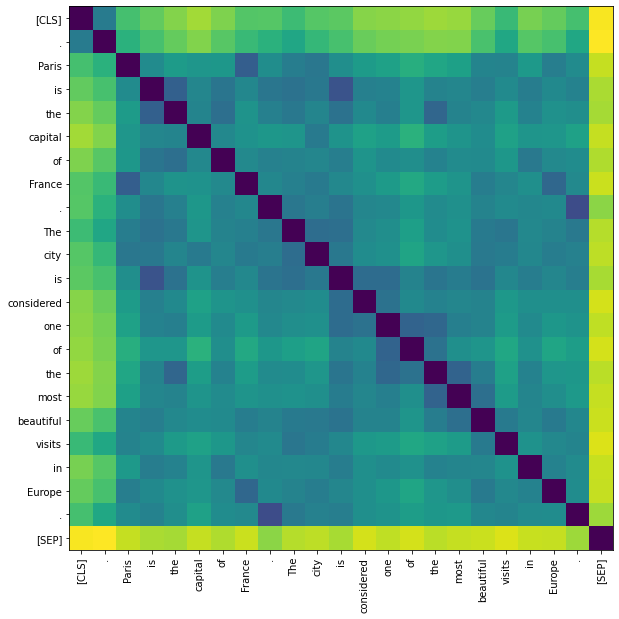

In [ ]:
fig, axs = plt.subplots(figsize=(20, 10))
axs.imshow(distances)

axs.set_xticks(range(len(embeddings)))
axs.set_yticks(range(len(embeddings)))
axs.set_xticklabels(tokens, rotation=90)
axs.set_yticklabels(tokens);

# Embedding de textos

Podemos usar BERT para generar embeddings de textos (concepto similar a word embedding pero aplicado a frases o textos).


Vamos a cargar ahora un modelo de DistilBert. Esto es una modificación de Bert que resulta ser más ligera y fácil de usar.

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

Cargamos un dataset de textos de noticias junto con la categoría a la que pertenencen para poder hacer una prueba.

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("ag_news")

Using custom data configuration default


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset ag_news downloaded and prepared to /root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
texts_train = dataset["train"]["text"][:2_500]
y_train = np.asarray(dataset["train"]["label"][:2_500])

texts_val = dataset["test"]["text"][:1_000]
y_val = np.asarray(dataset["test"]["label"][:1_000])

In [ ]:
labels = {0: "world", 1: "sports", 2: "Business", 3: "Sice/Tech"}

In [ ]:
len(texts_train)

2500

Ahora, generaremos el embedding del párrafo como la media de los embeddings de cada una de sus palabras.

In [ ]:
from tqdm import tqdm


def encode_text(text):
    X_text = tokenizer([text], return_tensors="tf")
    return np.mean(bert_model(X_text).last_hidden_state, axis=1)


encodings_text = [encode_text(t) for t in tqdm(texts_train, position=0, leave=True)]

100%|██████████| 2500/2500 [05:14<00:00,  7.94it/s]


In [ ]:
np.asarray(encodings_text).shape

(2500, 1, 768)

Utilizamos TSNE para reducir la dimensionalidad de los embeddings resultantes y los ploteamos en 2 dimensiones usando la etiqueta para distinguir el color.

In [ ]:
encodings_text = np.asarray(encodings_text).squeeze()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(2)

embeddings_train_tsne = tsne.fit_transform(np.asarray(encodings_text))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


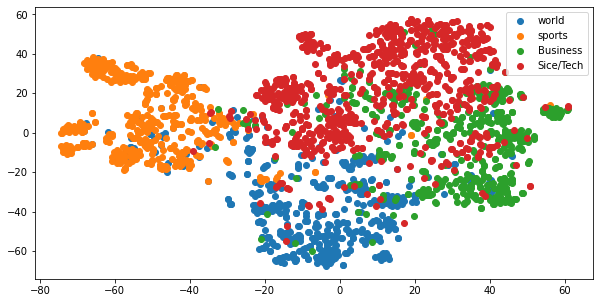

In [ ]:
plt.figure(figsize=(10, 5))
for i in labels.keys():
    emb_i = embeddings_train_tsne[y_train == i]
    plt.scatter(emb_i[:, 0], emb_i[:, 1], label=labels[i])
plt.legend();

# Clasificación de textos

Finalmente, haremos una prueba de entrenamiento de un modelo de clasificación.

El modelo cargado se puede usar como una layer de un modelo de clasificación, de forma que pondremos sobre él algunas capas y una sigmoide.

Para ello, se suele usar el encoding del token especial [CLS]

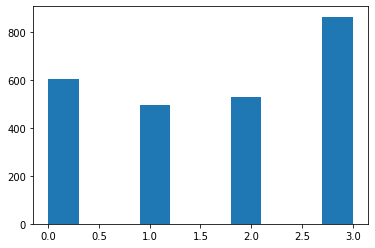

In [ ]:
plt.hist(y_train);

In [ ]:
from transformers import AutoTokenizer, TFAutoModel

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

bert_model = TFAutoModel.from_pretrained("distilroberta-base")

Some layers from the model checkpoint at distilroberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
class DatasetGenerator(keras.utils.Sequence):
    def __init__(self, texts, targets, batch_size):
        super().__init__()
        self.texts = np.asarray(texts)
        self.targets = np.asarray(targets)
        self.batch_size = batch_size
        self.on_epoch_end()

    def __len__(self):
        "Denotes the number of batches per epoch"
        return int(np.floor(len(self.texts) / self.batch_size))

    def on_epoch_end(self):
        "Updates indexes after each epoch"
        self.indexes = np.arange(len(self.texts))
        np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        "Generate one batch of data"
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

        texts_batch = self.texts[indexes]
        y_batch = self.targets[indexes]

        X_batch = tokenizer(
            texts_batch.tolist(), return_tensors="tf", truncation=True, padding=True
        )
        return dict(X_batch), np.expand_dims(y_batch, -1)

In [ ]:
generator_train = DatasetGenerator(texts_train, y_train, 4)
generator_val = DatasetGenerator(texts_val, y_val, 4)

In [ ]:
HIDDEN_LAYERS_SIZES = [50, 10]
N_TARGETS = len(list(set(y_train)))

inputs = [
    keras.layers.Input(shape=(None,), name=n, dtype="int32")
    for n in ["input_ids", "attention_mask"]
]
hidden_layers = [keras.layers.Dense(h, activation="relu") for h in HIDDEN_LAYERS_SIZES]
last_layer = keras.layers.Dense(
    1 if N_TARGETS == 2 else N_TARGETS,
    activation="sigmoid" if N_TARGETS == 2 else "softmax",
)

In [ ]:
x = bert_model(inputs)

# We take the embedding of the [CLS] token
x = x["last_hidden_state"][:, 0, :]

for l in hidden_layers:
    x = l(x)

output = last_layer(x)

In [ ]:
bert_model.trainable = False

In [ ]:
classification_model = keras.models.Model(inputs, output, name="classification_model")

In [ ]:
metrics = (
    ["accuracy", keras.metrics.AUC(name="auc")]
    if N_TARGETS == 2
    else ["sparse_categorical_accuracy"]
)


classification_model.compile(
    "adam",
    "binary_crossentropy" if N_TARGETS == 2 else "sparse_categorical_crossentropy",
    metrics=metrics,
)

In [ ]:
classification_model.summary()

Model: "classification_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, None)]       0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 tf_roberta_model_5 (TFRobertaM  TFBaseModelOutputWi  82118400   ['input_ids[0][0]',              
 odel)                          thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, None                            

In [ ]:
history = classification_model.fit(
    generator_train, epochs=10, validation_data=generator_val
)

Epoch 1/10
625/625 [==============================] - 60s 77ms/step - loss: 1.0633 - sparse_categorical_accuracy: 0.5268 - val_loss: 0.8559 - val_sparse_categorical_accuracy: 0.6720
Epoch 2/10
625/625 [==============================] - 44s 70ms/step - loss: 0.6468 - sparse_categorical_accuracy: 0.7992 - val_loss: 0.4940 - val_sparse_categorical_accuracy: 0.8640
Epoch 3/10
625/625 [==============================] - 44s 70ms/step - loss: 0.4058 - sparse_categorical_accuracy: 0.8620 - val_loss: 0.4188 - val_sparse_categorical_accuracy: 0.8580
Epoch 4/10
625/625 [==============================] - 45s 72ms/step - loss: 0.3734 - sparse_categorical_accuracy: 0.8656 - val_loss: 0.3282 - val_sparse_categorical_accuracy: 0.8790
Epoch 5/10
625/625 [==============================] - 43s 69ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.8804 - val_loss: 0.3261 - val_sparse_categorical_accuracy: 0.8810
Epoch 6/10
625/625 [==============================] - 43s 68ms/step - loss: 0.3221 - spars